In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('joint_probs.csv', skipinitialspace=True)

In [3]:
def get_perf_joint_probs(func_name, flop):
    perf_df = df[['n', func_name]].head(12)
    N = 2 ** perf_df['n']
    perf_df['flop'] = flop(N)
    perf_df['perf'] = perf_df['flop'] / perf_df[func_name]
    return perf_df

In [4]:
v1 = get_perf_joint_probs('joint_probs_baseline', lambda n : 2329*n*n - 728*n)
v2 = get_perf_joint_probs('joint_probs_unroll8', lambda n : 1938.5*n*n + 1230.5*n)
v3 = get_perf_joint_probs('joint_probs_avx_fma_acc4', lambda n : 2788.5*n*n + 380.5*n)

Text(0, 0.5, 'Performance [F/C]')

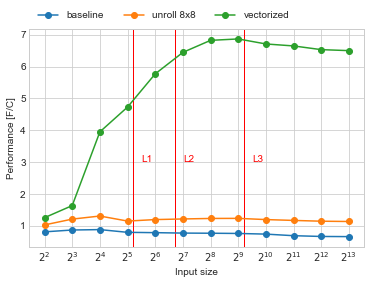

In [5]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()

ax.axvline(x=5.2, linewidth=1, color='r')
ax.text(5.5, 3, 'L1', color='r')
ax.axvline(x=6.7, linewidth=1, color='r')
ax.text(7, 3, 'L2', color='r')
ax.axvline(x=9.2, linewidth=1, color='r')
ax.text(9.5, 3, 'L3', color='r')

ax.plot(v1['n'], v1['perf'], '-o', label='baseline')
ax.plot(v2['n'], v2['perf'], '-o', label='unroll 8x8')
ax.plot(v3['n'], v3['perf'], '-o', label='vectorized')


ticks_label = [r"$2^{{{}}}$".format(x) for x in v1['n']]
ax.set_xticks(v1['n'])
ax.set_xticklabels(ticks_label)
# ax.set_ylim(top=2.95)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", ncol=4)

ax.set_xlabel('Input size')
ax.set_ylabel('Performance [F/C]')

In [6]:
v3

,n,joint_probs_avx_fma_acc4,flop,perf
0,2,3.676680e+04,4.613800e+04,1.254882
1,3,1.110340e+05,1.815080e+05,1.634706
2,4,1.822050e+05,7.199440e+05,3.951286
3,5,6.061700e+05,2.867600e+06,4.730686
4,6,1.982650e+06,1.144605e+07,5.773106
5,7,7.092390e+06,4.573549e+07,6.448530
6,8,2.678430e+07,1.828445e+08,6.826557
7,9,1.064240e+08,7.311834e+08,6.870474
8,10,4.356390e+08,2.924344e+09,6.712769
9,11,1.758690e+09,1.169660e+10,6.650743


In [7]:
def get_perf_log_perplexity(func_name, flop):
    perf_df = df[['n', func_name]]
    N = 2 ** df['n']
    perf_df['perf'] = flop(N) / df[func_name]
    return perf_df

In [8]:
v1 = get_perf_log_perplexity('log_perplexity_baseline', lambda n: 23*n + 5)
v2 = get_perf_log_perplexity('log_perplexity_unroll8', lambda n: 23*n + 5)
v3 = get_perf_log_perplexity('log_perplexity_avx_acc4', lambda n: 40*n - 12)
v4 = get_perf_log_perplexity('log_perplexity_avx_fma_acc4', lambda n: 40*n - 12)

<ipython-input-7-c9259dbbf516>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_df['perf'] = flop(N) / df[func_name]


Text(0, 0.5, 'Performance [F/C]')

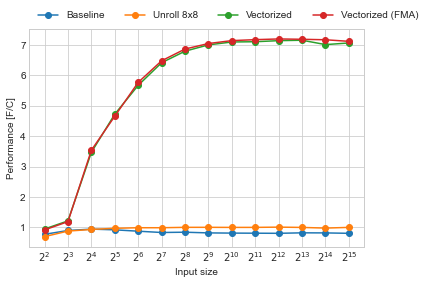

In [9]:
fig, ax = plt.subplots()

# ax.axvline(x=11, linewidth=1, color='r')
# ax.text(11.5, 1.65, 'L1', color='r')

ax.plot(v1['n'], v1['perf'], '-o', label='Baseline')
ax.plot(v2['n'], v2['perf'], '-o', label='Unroll 8x8')
ax.plot(v3['n'], v3['perf'], '-o', label='Vectorized')
ax.plot(v4['n'], v4['perf'], '-o', label='Vectorized (FMA)')


ticks_label = [r"$2^{{{}}}$".format(x) for x in v1['n']]
ax.set_xticks(v1['n'])
ax.set_xticklabels(ticks_label)
# ax.set_ylim(top=2.95)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", ncol=4)

ax.set_xlabel('Input size')
ax.set_ylabel('Performance [F/C]')